In [65]:
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
log_dir='runs/my_experiment'
grad_path = sorted((Path(log_dir) / 'gradients').glob('*.pkl'))

In [3]:
with open(grad_path[0], 'rb') as f:
    gradient_data = pickle.load(f)

In [4]:
gradient_data['layer_0_weight'].shape

(300, 784)

<BarContainer object of 235200 artists>

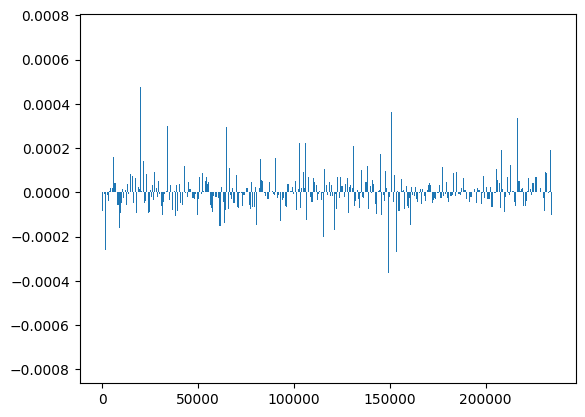

In [ ]:
gradient_values = gradient_data['layer_0_weight']
plt.bar(np.arange(len(gradient_values.reshape(-1))), gradient_values.reshape(-1))

In [59]:
gradient_values = gradient_data['layer_0_weight']
fig, ax = plt.subplots(figsize=(0.0033 * len(gradient_values.reshape(-1)), 0.0003  * len(gradient_values.reshape(-1))))
ax.scatter(np.arange(len(gradient_values.reshape(-1))), gradient_values.reshape(-1), s=10)

<Axes: >

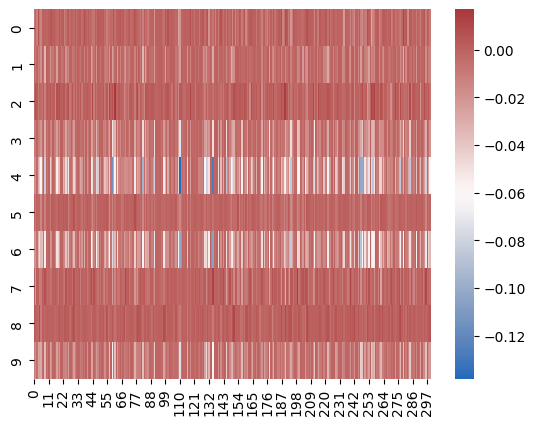

In [42]:
sns.heatmap(gradient_values, cmap='vlag')

<Axes: >

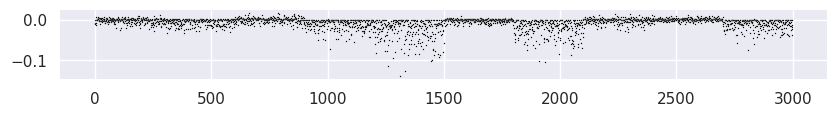

In [81]:
log_dir='runs/my_experiment'
grad_path = sorted((Path(log_dir) / 'gradients').glob('*.pkl'))
with open(grad_path[0], 'rb') as f:
    gradient_data = pickle.load(f)
gradient_values = gradient_data['layer_2_weight']
temp_gradient = gradient_values.mean(axis = 0)
fig, ax = plt.subplots(figsize=(0.0033 * len(gradient_values.reshape(-1)), 0.0003  * len(gradient_values.reshape(-1))))
sns.despine(fig, left=True, bottom=True)
sns.scatterplot(x=np.arange(len(gradient_values.reshape(-1))), y=gradient_values.reshape(-1), s=1, ax=ax, color='black')

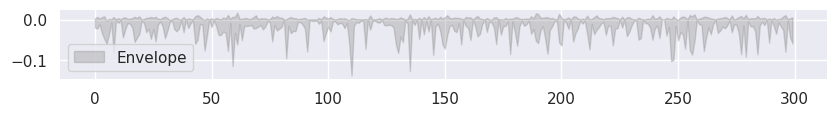

In [84]:
log_dir='runs/my_experiment'
grad_path = sorted((Path(log_dir) / 'gradients').glob('*.pkl'))
with open(grad_path[0], 'rb') as f:
    gradient_data = pickle.load(f)
gradient_values = gradient_data['layer_2_weight']
temp_gradient = gradient_values.mean(axis=0)

# Calculate envelope (min and max across the first axis)
gradient_mean = gradient_values.mean(axis=0)
gradient_min = gradient_values.min(axis=0)
gradient_max = gradient_values.max(axis=0)

fig, ax = plt.subplots(figsize=(0.0033 * len(gradient_values.reshape(-1)), 0.0003 * len(gradient_values.reshape(-1))))
sns.despine(fig, left=True, bottom=True)

x = np.arange(len(gradient_mean))
# ax.plot(x, gradient_mean, color='black', linewidth=1, label='Mean')
ax.fill_between(x, gradient_min, gradient_max, alpha=0.3, color='gray', label='Envelope')
ax.legend()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Initialize variables
log_dir = 'runs/my_experiment'
grad_path = sorted((Path(log_dir) / 'gradients').glob('*.pkl'))
current_index = 0

# Create output widget for the plot
output = widgets.Output()

# Function to update the plot
def update_plot(index):
    with output:
        clear_output(wait=True)
        with open(grad_path[index], 'rb') as f:
            gradient_data = pickle.load(f)
        gradient_values = gradient_data['layer_2_weight']
        temp_gradient = gradient_values.mean(axis=0)
        fig, ax = plt.subplots(figsize=(0.0033 * len(gradient_values.reshape(-1)), 0.0003 * len(gradient_values.reshape(-1))))
        sns.despine(fig, left=True, bottom=True)
        sns.scatterplot(x=np.arange(len(gradient_values.reshape(-1))), y=gradient_values.reshape(-1), s=1, ax=ax, color='black')
        ax.set_title(f'Gradient Step {index}/{len(grad_path)-1}')
        plt.show()

# Button click handler
def on_next_click(b):
    global current_index
    if current_index < len(grad_path) - 1:
        current_index += 1
        update_plot(current_index)
        prev_button.disabled = False
        if current_index == len(grad_path) - 1:
            next_button.disabled = True

def on_prev_click(b):
    global current_index
    if current_index > 0:
        current_index -= 1
        update_plot(current_index)
        next_button.disabled = False
        if current_index == 0:
            prev_button.disabled = True

# Create buttons
next_button = widgets.Button(description='Next Step')
prev_button = widgets.Button(description='Previous Step')
prev_button.disabled = True

next_button.on_click(on_next_click)
prev_button.on_click(on_prev_click)

# Display initial plot
update_plot(current_index)

# Display buttons and output
display(widgets.HBox([prev_button, next_button]))
display(output)

Output()

In [ ]:
gradient_values.reshape(-1).shape

(10, 300)